## UTS_202131078_Arfani Lovina Br.Stendel

#### Regresi Linear

In [1]:
# melakukan import
import pandas as pd

In [2]:
# memuat data dari file CSV 'R02_rice_field.csv' ke dalam variabel data menggunakan Pandas
data = pd.read_csv('R02_rice_field.csv')

## Pengumpulan Data

In [3]:
# memberikan informasi singkat dataset yang disimpan dalam DataFrame data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Production (X)    224 non-null    float64
 1   Harvest Area (Y)  224 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


In [4]:
# menampilkan 5 data teratas
data.head()

,Production (X),Harvest Area (Y)
0,1329536.0,323589.0
1,1299699.0,329041.0
2,1382905.0,339253.0
3,1419128.0,348223.0
4,1368074.0,337561.0


In [5]:
# data preposessing dari float ke integer
data['Production (X)']=data['Production (X)'].astype(int)
data['Harvest Area (Y)']=data['Harvest Area (Y)'].astype(int)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Production (X)    224 non-null    int32
 1   Harvest Area (Y)  224 non-null    int32
dtypes: int32(2)
memory usage: 1.9 KB


In [7]:
data.head()

,Production (X),Harvest Area (Y)
0,1329536,323589
1,1299699,329041
2,1382905,339253
3,1419128,348223
4,1368074,337561


## Split Data

In [8]:
import numpy as np
# data salary
x_train = data['Production (X)'].values[:, np.newaxis]
y_train = data['Harvest Area (Y)'].values

## Pembentukan Model

In [9]:
# melatih model regresi linear menggunakan scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Testing

In [10]:
x_train_test = [[12786],[85545],[76456]]
pred_Panen = model.predict(x_train_test)
print("Prediksi Hasil Panen : ", pred_Panen)

Prediksi Hasil Panen :  [71815.20266373 85020.51050059 83370.91329709]


In [11]:
# Rumus Regresi -> y = ax + b (a = koefisien, b = intercept)
print("Koefisien : ", model.coef_)
print("Intercept : ", model.intercept_)

Koefisien :  [0.18149381]
Intercept :  69494.62285914301


In [12]:
# menghitung nilai y berdasarkan model regresi linear yang telah dilatih, menggunakan nilai input 12786
y = model.coef_ * 12786 + model.intercept_
print(y)

[71815.20266373]


## Visualisasi

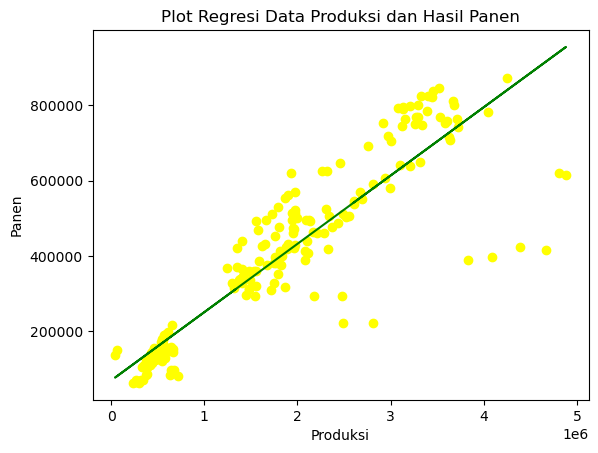

In [13]:
import matplotlib.pyplot as plt

prediksi_Panen = model.predict(x_train)
dataframe_baru = pd.DataFrame({'Produksi': data['Production (X)'], 'Panen': prediksi_Panen})
plt.scatter(data['Production (X)'], data['Harvest Area (Y)'], color="yellow")
plt.plot(dataframe_baru.Produksi, dataframe_baru.Panen, color="green")
plt.xlabel('Produksi')
plt.ylabel('Panen')
plt.title('Plot Regresi Data Produksi dan Hasil Panen')
plt.show()

# Matplotlib untuk membuat scatter plot dari data produksi dan luas panen, 
# serta menampilkan regresi linear berdasarkan model yang telah dilatih. 
# Plot tersebut membantu visualisasi sejauh mana model cocok dengan data.